<a href="https://colab.research.google.com/github/arjunjyothieswarb/EECE5550/blob/main/Project/Global_Planner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
!pip install git+https://gitlab.com/neu-autonomy/gym-neu-racing.git

  Cloning https://gitlab.com/neu-autonomy/gym-neu-racing.git to /tmp/pip-req-build-7xll865e
  Running command git clone --filter=blob:none --quiet https://gitlab.com/neu-autonomy/gym-neu-racing.git /tmp/pip-req-build-7xll865e
  Resolved https://gitlab.com/neu-autonomy/gym-neu-racing.git to commit 60f6a0e80b5ae6dd14fb13a837c252d0d88fe571
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 19.8 MB/s eta 0:00:00
  Created wheel for gym-neu-racing: filename=gym_neu_racing-0.0.1-py3-none-any.whl size=65580 sha256=176f54251cb4456914836b08942585c6c755e95a87342858bc761ecd0b777153
  Stored in directory: /tmp/pip-ephem-wheel-cache-fxomk36m/wheels/2b/40/20/13d3d44e20167f192ae2e89c0c279882d6064e6d226cc3efaa
Successfully built gym-neu-racing


In [3]:
!pip install gtsam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 61.7 MB/s eta 0:00:00


In [4]:
import gymnasium
import numpy as np
import gym_neu_racing
from gymnasium import spaces
from gym_neu_racing.envs.wrappers import StateFeedbackWrapper, MappingWrapper
import matplotlib.pyplot as plt
from typing import Callable
import matplotlib.cm as cmx
import matplotlib.colors as colors
from gym_neu_racing import motion_models
from gym_neu_racing import sensor_models
from gym_neu_racing.sensor_models import Lidar2D
from gym_neu_racing.sensor_models.sensor_model import SensorModel
from typing import Iterable, Optional
import gtsam
import matplotlib.pyplot as plt
import numpy as np
from gtsam import Marginals, Point2, Point3, Pose2, Pose3, Values
from gtsam.symbol_shorthand import L, X
from matplotlib import patches
from scipy.linalg import expm

# Implementation

## Setting up the environment

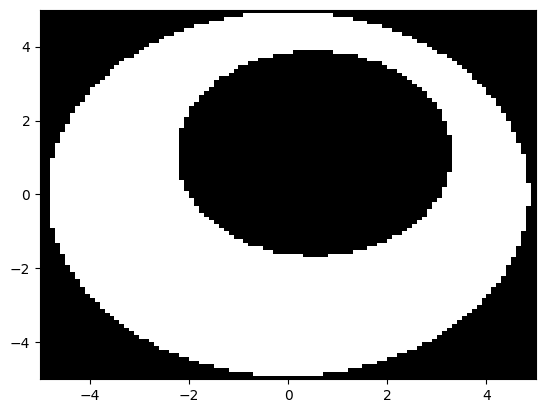

In [6]:
env = gymnasium.make("gym_neu_racing/NEURacing-v0")
env.unwrapped.map.draw_map()
env = MappingWrapper(env)

# Initialize the environment (and set random seed so any randomness is repeatable)
np.random.seed(0)

# Setting the wheel radius and spacing
robot_radius = 0.25
robot_wheel_spacing = 0.5

# Tell the environment to use your new Lidar2D sensor
env.unwrapped.sensor_models = {
    "state": sensor_models.StateFeedback(),
    "lidar": sensor_models.Lidar2D(env.unwrapped.map),
}

# Reset the environment and get the first observation (state + lidar)
obs, _ = env.reset()

# initialize the robot in a particular state (feel free to start from different places when testing your algorithm)
env.unwrapped.state = np.array([0.5, -3.5, np.pi])
obs["state"] = env.unwrapped.state
obs["lidar"] = env.unwrapped.sensor_models["lidar"].step(obs["state"])

